과제) 네이버 뉴스에서 본인이 선택한 검색어로 검색 한 결과를 json으로 저장 한 후    
1) 적절하지 않은 단어를 제거 한 후   
2) 단어 빈도수 기준으로 histogram 생성  
3) word cloud 생성.   

아래 code를 변형 하여 사용.   
가능 하면 본인의 client id와 client secret 사용 할 것. 2주차 과제에 업로드 된 code확인


In [33]:
import os
import sys
import urllib.request
import datetime
import time
import json

client_id = '9DJjN_UoiVw9xsNrcWAG'
client_secret = '6qEKmlidPH'


#[CODE 1]
def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   #[CODE 1]
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):    
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    
    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    
    jsonResult.append({'cnt':cnt, 'title':title, 'description': description, 
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return    

#[CODE 0]
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']
 
    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):         
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]       
        
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]
       
    print('전체 검색 : %d 건' %total)
    
    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)
                        
        outfile.write(jsonFile)
        
    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))
    
if __name__ == '__main__':
    main()


검색어를 입력하세요: 바이올렛
[2022-12-04 02:37:25.227357] Url Request Success
[2022-12-04 02:37:26.121581] Url Request Success
[2022-12-04 02:37:26.986013] Url Request Success
[2022-12-04 02:37:27.884292] Url Request Success
[2022-12-04 02:37:28.797984] Url Request Success
[2022-12-04 02:37:29.690734] Url Request Success
[2022-12-04 02:37:30.565564] Url Request Success
[2022-12-04 02:37:31.433446] Url Request Success
[2022-12-04 02:37:32.288700] Url Request Success
[2022-12-04 02:37:33.169449] Url Request Success
HTTP Error 400: Bad Request
[2022-12-04 02:37:33.825186] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EB%B0%94%EC%9D%B4%EC%98%AC%EB%A0%9B&start=1001&display=100
전체 검색 : 34608 건
가져온 데이터 : 1000 건
바이올렛_naver_news.json SAVED


In [2]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:14 http://security.ubuntu.c

In [3]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


# 8장. 텍스트빈도분석 - 2) 한글 단어 분석 

## 한글 단어 분석을 위한 패키지 준비

In [4]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [34]:
inputFileName = '/content/바이올렛_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': '어둠이 내리면 보라색 별이 쏟아져 내리는 듯한 ‘<b>바이올렛</b>판타지’, 전구로 만든 유럽의 화려한 궁전 ‘로맨틱가든’, 국내에서 가장 긴 빛의 터널인 ‘터널갤럭시101’ 등이 빛의 향연을 펼친다. 별빛정원우주 동절기... ',
  'link': 'http://www.mydaily.co.kr/new_yk/html/read.php?newsid=202212031942933465&ext=na&utm_campaign=naver_news&utm_source=naver&utm_medium=related_news',
  'org_link': 'http://www.mydaily.co.kr/new_yk/html/read.php?newsid=202212031942933465&ext=na&utm_campaign=naver_news&utm_source=naver&utm_medium=related_news',
  'pDate': '2022-12-03 19:44:00',
  'title': '12월이 반짝반짝★ 빛나는 겨울밤 여행 명소 6'},
 {'cnt': 2,
  'description': '어둠이 내리면 보라색 별이 쏟아져 내리는 듯한 ‘<b>바이올렛</b>판타지’, 전구로 만든 유럽의 화려한 궁전 ‘로맨틱가든’, 국내에서 가장 긴 빛의 터널인 ‘터널갤럭시101’ 등이 빛의 향연을 펼친다. 별빛정원우주 동절기... ',
  'link': 'http://www.mydaily.co.kr/new_yk/html/read.php?newsid=202212031646256712&ext=na&utm_campaign=naver_news&utm_source=naver&utm_medium=related_news',
  'org_link': 'http://www.mydaily.co.kr/new_yk/html/read.php?newsid=202212031646256712&ext=na&utm_campaign=naver_news&utm_sourc

### 1-2. 분석할 데이터 추출

In [35]:
message = '포켓몬'

for item in data:
#    if 'message' in item.keys(): 
#        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
    if 'description' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['description']) +''
        
message #출력하여 내용 확인

'포켓몬어둠이 내리면 보라색 별이 쏟아져 내리는 듯한   b 바이올렛  b 판타지   전구로 만든 유럽의 화려한 궁전  로맨틱가든   국내에서 가장 긴 빛의 터널인  터널갤럭시101  등이 빛의 향연을 펼친다  별빛정원우주 동절기    어둠이 내리면 보라색 별이 쏟아져 내리는 듯한   b 바이올렛  b 판타지   전구로 만든 유럽의 화려한 궁전  로맨틱가든   국내에서 가장 긴 빛의 터널인  터널갤럭시101  등이 빛의 향연을 펼친다  별빛정원우주 동절기    최고의 글로벌 IP로 자리 잡은 포켓몬스터의 아홉 번째 타이틀  apos 스칼렛  b 바이올렛  b  apos 이 나왔다  1996년 게임보이    콘텐츠가 서로 다른 대한민국 대표 포켓몬 스트리머  apos 에투샤 apos    apos 눈파티 apos    apos 박세준 apos 과 함께 스칼렛  b 바이올렛  b 의    2 레피소드ㅣ비하인드유 EDP  겨울향수  폭닥폭닥  코박죽향기 산뜻한 레몬 향이 첫 향  이어서 로즈   b 바이올렛  b   백합의 풍부한 꽃향기가 등장한다  향이 진행될수록 은은하고 파우더리하게 마무리되어 편안하게    행운의 시간   오후 2시 행운의 물건   음악 행운의 장소   산  수목원 행운의 색상    b 바이올렛  b  12   별자리별 오늘의 운세  염소자리  12월 25일 1월 19일  심리적으로 조금 불안정해지는 날입니다  하지만 이러한 불안정은 곧     b 바이올렛  b   자두  블루베리  블랙베리와 같은 꽃과 과실의 풍성한 아로마가 코 끝을 사로잡으며  달콤하면서도 스파이시한 시나몬  다크 초콜렛과 같은 캐릭터와 오크 풍미가 매력적으로 다가온다  특히    어둠이 내리면 보라색 별이 쏟아져 내리는 듯한  apos  b 바이올렛  b 판타지 apos   전구로 만든 유럽의 화려한 궁전  apos 로맨틱가든 apos   국내에서 가장 긴 빛의 터널인  apos 터널갤럭시101 apos  등이 빛의 향연을 펼친다  별빛정원우주 동절기 이용    포켓몬 스

### 1-3. 품사 태깅 : 명사 추출

In [36]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

['포켓몬',
 '어둠',
 '보라색',
 '별',
 '듯',
 '바이올렛',
 '판타지',
 '전구',
 '유럽',
 '궁전',
 '로맨틱',
 '가든',
 '국내',
 '가장',
 '빛',
 '터널',
 '터널',
 '갤럭시',
 '등',
 '빛',
 '향연',
 '별빛',
 '정원',
 '우주',
 '절기',
 '어둠',
 '보라색',
 '별',
 '듯',
 '바이올렛',
 '판타지',
 '전구',
 '유럽',
 '궁전',
 '로맨틱',
 '가든',
 '국내',
 '가장',
 '빛',
 '터널',
 '터널',
 '갤럭시',
 '등',
 '빛',
 '향연',
 '별빛',
 '정원',
 '우주',
 '절기',
 '최고',
 '글로벌',
 '로',
 '자리',
 '포켓몬스터',
 '아홉',
 '타이틀',
 '스칼렛',
 '바이올렛',
 '이',
 '게임보이',
 '콘텐츠',
 '서로',
 '다른',
 '대한민국',
 '대표',
 '포켓몬',
 '스트리머',
 '에투',
 '샤',
 '눈',
 '파티',
 '박세준',
 '과',
 '스칼렛',
 '바이올렛',
 '의',
 '레피',
 '소드',
 '드유',
 '겨울',
 '향수',
 '폭닥폭닥',
 '코박죽',
 '향기',
 '레몬',
 '향',
 '첫',
 '향',
 '로',
 '바이올렛',
 '백합',
 '꽃',
 '향기',
 '등장',
 '향',
 '진행',
 '파우더',
 '리하',
 '마무리',
 '행운',
 '시간',
 '오후',
 '행운',
 '물건',
 '음악',
 '행운',
 '장소',
 '산',
 '수목원',
 '행운',
 '색상',
 '바이올렛',
 '별자리',
 '별',
 '오늘',
 '운세',
 '염소자리',
 '심리',
 '조금',
 '날',
 '불안',
 '정은',
 '곧',
 '바이올렛',
 '자두',
 '블루베리',
 '블랙베리',
 '꽃',
 '과실',
 '아로마',
 '코',
 '끝',
 '스파이',
 '시한',
 '시나몬',
 '다크',
 '초콜렛',
 '캐릭터',
 '오크',

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [37]:
count = Counter(message_N)

count   #출력하여 내용 확인

Counter({'포켓몬': 75,
         '어둠': 13,
         '보라색': 35,
         '별': 89,
         '듯': 24,
         '바이올렛': 1296,
         '판타지': 22,
         '전구': 13,
         '유럽': 24,
         '궁전': 13,
         '로맨틱': 15,
         '가든': 47,
         '국내': 28,
         '가장': 84,
         '빛': 41,
         '터널': 24,
         '갤럭시': 376,
         '등': 337,
         '향연': 11,
         '별빛': 8,
         '정원': 13,
         '우주': 9,
         '절기': 6,
         '최고': 6,
         '글로벌': 17,
         '로': 25,
         '자리': 5,
         '포켓몬스터': 209,
         '아홉': 1,
         '타이틀': 14,
         '스칼렛': 210,
         '이': 190,
         '게임보이': 2,
         '콘텐츠': 13,
         '서로': 3,
         '다른': 27,
         '대한민국': 1,
         '대표': 23,
         '스트리머': 1,
         '에투': 1,
         '샤': 1,
         '눈': 3,
         '파티': 1,
         '박세준': 1,
         '과': 71,
         '의': 364,
         '레피': 1,
         '소드': 4,
         '드유': 1,
         '겨울': 5,
         '향수': 18,
         '폭닥폭닥': 1,
         '코

In [38]:
word_count = dict()

#for tag, counts in count.most_common(80):
for tag, counts in count.most_common(70):  
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

바이올렛 : 1296
갤럭시 : 376
행운 : 362
색상 : 251
스칼렛 : 210
포켓몬스터 : 209
포도 : 198
캐릭터 : 183
컬러 : 171
출시 : 161
퍼플 : 144
플립 : 136
팬텀 : 135
라이트 : 130
플러스 : 128
게임 : 117
유호 : 114
모델 : 106
라벤더 : 99
체리 : 95
세트 : 94
시간 : 93
물건 : 91
장소 : 89
가장 : 84
가지 : 79
연출 : 79
최근 : 78
리즈 : 78
운세 : 77
카카오 : 77
가디스 : 77
공개 : 77
오후 : 76
닌텐도 : 76
블랙 : 76
포켓몬 : 75
오늘 : 74
망고 : 74
백화점 : 73
추가 : 71
블루 : 70
통해 : 70
더욱 : 70
브랜드 : 68
비롯 : 66
별자리 : 65
지난해 : 65
샤인 : 64
적용 : 64
도입 : 63
선택 : 62
프리미엄 : 62
아트 : 61


In [39]:
print(word_count)

{'바이올렛': 1296, '갤럭시': 376, '행운': 362, '색상': 251, '스칼렛': 210, '포켓몬스터': 209, '포도': 198, '캐릭터': 183, '컬러': 171, '출시': 161, '퍼플': 144, '플립': 136, '팬텀': 135, '라이트': 130, '플러스': 128, '게임': 117, '유호': 114, '모델': 106, '라벤더': 99, '체리': 95, '세트': 94, '시간': 93, '물건': 91, '장소': 89, '가장': 84, '가지': 79, '연출': 79, '최근': 78, '리즈': 78, '운세': 77, '카카오': 77, '가디스': 77, '공개': 77, '오후': 76, '닌텐도': 76, '블랙': 76, '포켓몬': 75, '오늘': 74, '망고': 74, '백화점': 73, '추가': 71, '블루': 70, '통해': 70, '더욱': 70, '브랜드': 68, '비롯': 66, '별자리': 65, '지난해': 65, '샤인': 64, '적용': 64, '도입': 63, '선택': 62, '프리미엄': 62, '아트': 61}


In [41]:
del word_count['갤럭시']
del word_count['플립']


In [30]:
print(word_count)

{'스칼렛': 1390, '바이': 310, '어드': 305, '포켓몬스터': 246, '바이올렛': 232, '감독': 142, '진행': 128, '출연': 116, '게임': 115, '출시': 102, '토트넘': 97, '앵커': 96, '포켓몬': 82, '리베': 82, '닌텐도': 81, '위치': 81, '배우': 79, '테이': 78, '데인': 74, '시리즈': 74, '헤어': 73, '작품': 71, '피에트': 69, '갈라': 66, '스타': 65, '프레': 65, '부산': 61, '빌딩': 59, '히어로': 54, '마르첼': 54, '캐릭터': 52, '지난': 51, '이번': 51, '블랙': 51, '실시간': 51, '스위치': 49, '제니퍼': 49, '공개': 48, '대자연': 48, '상담': 47, '통해': 46, '한국': 46, '브랜드': 46, '또한': 44, '사진': 44, '할리우드': 43, '전문': 43}


### 히스토그램

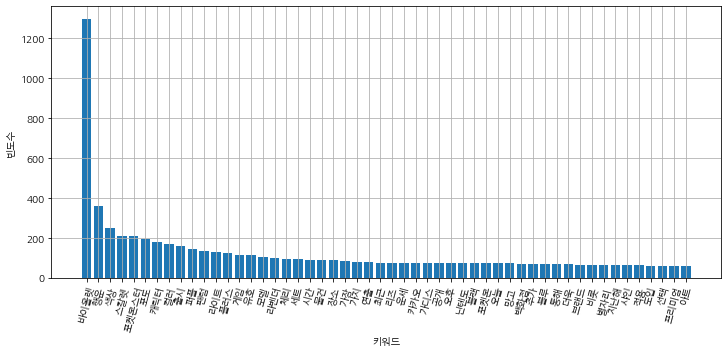

In [42]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

### 워드클라우드

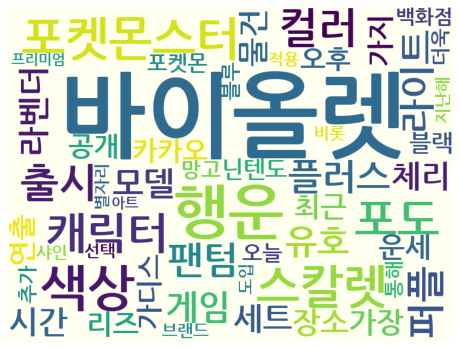

In [43]:
wc = WordCloud(path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud.to_file(inputFileName + '_cloud.jpg')